In [2]:
import pandas as pd
from neuralprophet import NeuralProphet
import matplotlib.pyplot as plt 

In [3]:
data = pd.read_csv("tempDemand.csv")
data = data.dropna()
data.tail()

data["dateTime"] = pd.to_datetime(data["dateTime"])
data

,dateTime,Temperature,TOTALDEMAND
0,2014-01-01 00:00:00,16.7,4993.52
1,2014-01-01 00:30:00,16.6,4656.03
2,2014-01-01 01:00:00,16.4,4373.04
3,2014-01-01 01:30:00,16.7,4175.32
4,2014-01-01 02:00:00,16.5,4003.35
...,...,...,...
105163,2019-12-31 21:30:00,17.6,4172.46
105164,2019-12-31 22:00:00,17.1,4129.96
105165,2019-12-31 22:30:00,16.6,4083.66
105166,2019-12-31 23:00:00,16.3,4104.95


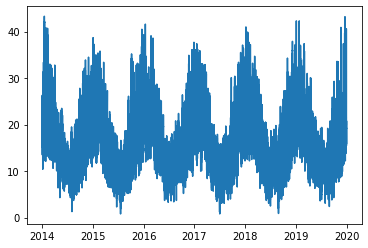

In [4]:
plt.plot(data['dateTime'], data["Temperature"])

In [7]:
new_column = data[['dateTime', 'TOTALDEMAND']]
new_column.columns = ['ds', 'y']
new_column.tail()

,ds,y
105163,2019-12-31 21:30:00,4172.46
105164,2019-12-31 22:00:00,4129.96
105165,2019-12-31 22:30:00,4083.66
105166,2019-12-31 23:00:00,4104.95
105167,2019-12-31 23:30:00,4325.88


In [8]:
n = NeuralProphet(
    yearly_seasonality=3,
    daily_seasonality=8,
    growth="off",
    learning_rate=0.1,)

df_train, df_test = n.split_df(new_column, valid_p = 0.10)

metrics = n.fit(new_column, validation_df=df_test, progress='plot')

INFO - (NP.df_utils._infer_frequency) - Major frequency 30T corresponds to 99.998% of the data.
INFO - (NP.df_utils._infer_frequency) - Dataframe freq automatically defined as 30T
INFO - (NP.df_utils._infer_frequency) - Major frequency 30T corresponds to 99.998% of the data.
INFO - (NP.df_utils._infer_frequency) - Dataframe freq automatically defined as 30T
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 128
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 57
WARNING - (NP.forecaster._train) - To plot live loss, please install neuralprophet[live].Using pip: 'pip install neuralprophet[live]'Or install the missing package manually: 'pip install livelossplot'
Traceback (most recent call last):
  File "c:\Users\kelsa\anaconda3\envs\maps\lib\site-packages\neuralprophet\forecaster.py", line 1829, in _train
    from livelossplot import PlotLosses
Modu

In [9]:
future = n.make_future_dataframe(new_column, periods=17260, n_historic_predictions=True)
forecast = n.predict(future)
forecast.tail()

INFO - (NP.df_utils._infer_frequency) - Major frequency 30T corresponds to 99.998% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 30T
WARNING - (py.warnings._showwarnmsg) - c:\Users\kelsa\anaconda3\envs\maps\lib\site-packages\neuralprophet\forecaster.py:2060: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(future_df)

INFO - (NP.df_utils._infer_frequency) - Major frequency 30T corresponds to 99.998% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 30T
INFO - (NP.df_utils._infer_frequency) - Major frequency 30T corresponds to 99.998% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - 30T
WARNING - (py.warnings._showwarnmsg) - c:\Users\kelsa\anaconda3\envs\maps\lib\site-packages\neuralprophet\forecaster.py:1406: FutureWarning: The fra

,ds,y,yhat1,residual1,trend,season_yearly,season_weekly,season_daily
122422,2020-12-25 11:30:00,None,5210.241211,NaN,5037.650391,-184.178085,181.837555,174.930954
122423,2020-12-25 12:00:00,None,5188.753906,NaN,5037.650391,-183.969818,176.815689,158.257828
122424,2020-12-25 12:30:00,None,5168.038086,NaN,5037.650391,-183.761551,171.515533,142.633957
122425,2020-12-25 13:00:00,None,5153.573242,NaN,5037.650391,-183.553223,165.930634,133.545135
122426,2020-12-25 13:30:00,None,5155.651367,NaN,5037.650391,-183.344910,160.054993,141.290909


In [10]:
forecast.head()

,ds,y,yhat1,residual1,trend,season_yearly,season_weekly,season_daily
0,2014-01-01 00:00:00,4993.52,4950.349609,-43.170391,5037.650391,-120.554047,191.626740,-158.373474
1,2014-01-01 00:30:00,4656.03,4855.976562,199.946563,5037.650391,-120.341660,192.795303,-254.127625
2,2014-01-01 01:00:00,4373.04,4665.447266,292.407266,5037.650391,-120.129280,194.053528,-446.127350
3,2014-01-01 01:30:00,4175.32,4443.964355,268.644355,5037.650391,-119.916924,195.397430,-669.166504
4,2014-01-01 02:00:00,4003.35,4265.669434,262.319434,5037.650391,-119.704559,196.822754,-849.099304


<Figure size 360x1800 with 0 Axes>

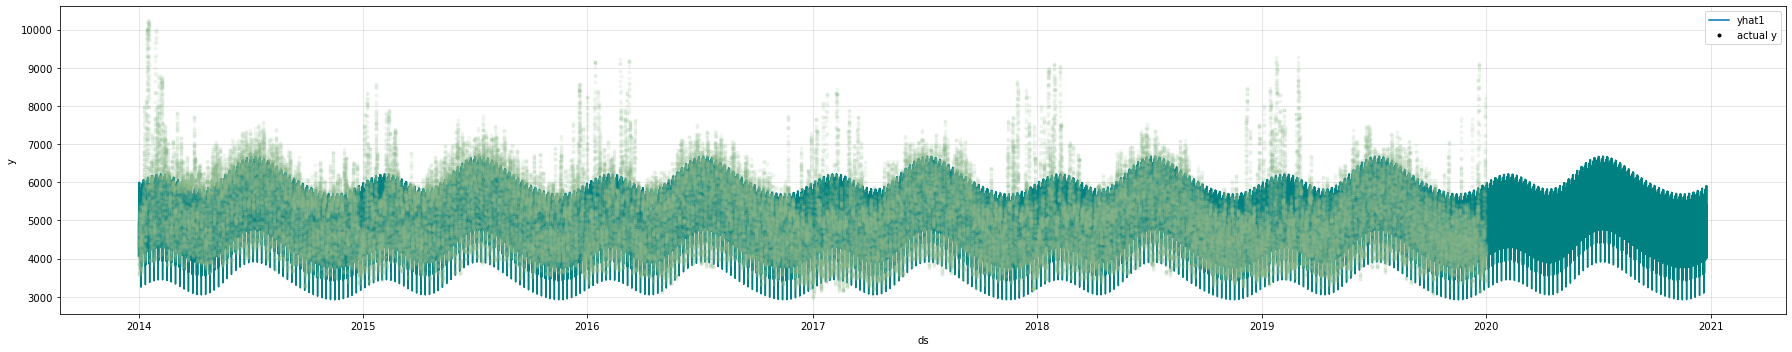

In [64]:
plt.figure(figsize=(5,25))

plot = n.plot(forecast, figsize=(25,5))

plt.gca().get_lines()[1].set_color("darkseagreen")
plt.gca().get_lines()[0].set_color("Teal")
plt.gca().get_lines()[1].set_alpha(0.1)